In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
avocado_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")

In [7]:
print(avocado_df.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0         0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1         1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2         2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3         3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4         4.0  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

     year  region  
0  2015.0  Albany  
1  2015.0  Albany  
2  2015.0  Albany  


In [8]:
print(avocado_df.isnull().sum())

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64


In [9]:
print(avocado_df.describe())

        Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  1517.000000   1517.000000  1.517000e+03  1.517000e+03  1.517000e+03   
mean     26.995386      1.074990  1.601879e+06  6.464387e+05  6.114375e+05   
std      14.848287      0.188891  4.433143e+06  1.947614e+06  1.672906e+06   
min       0.000000      0.490000  3.875074e+04  4.677200e+02  1.783770e+03   
25%      14.000000      0.980000  1.474700e+05  2.040034e+04  4.147606e+04   
50%      29.000000      1.080000  4.027919e+05  8.175117e+04  1.186649e+05   
75%      39.000000      1.190000  9.819751e+05  3.775785e+05  4.851503e+05   
max      51.000000      1.680000  4.465546e+07  1.893304e+07  1.895648e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03    1517.000000   
mean   5.040550e+04  2.935974e+05  2.487736e+05  4.264205e+04    2181.771074   
std    1.377812e+05  7.579765e+05  6.474765e+05  1.182157

C:\Users\User\AppData\Local\Temp\ipykernel_17436\76259830.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(avocado_df.corr(), annot=True, cmap='coolwarm')


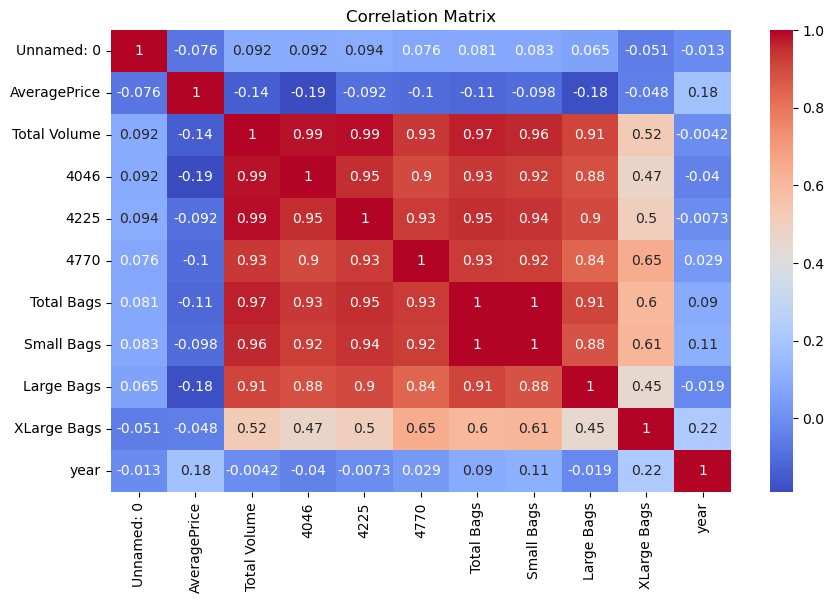

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(avocado_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

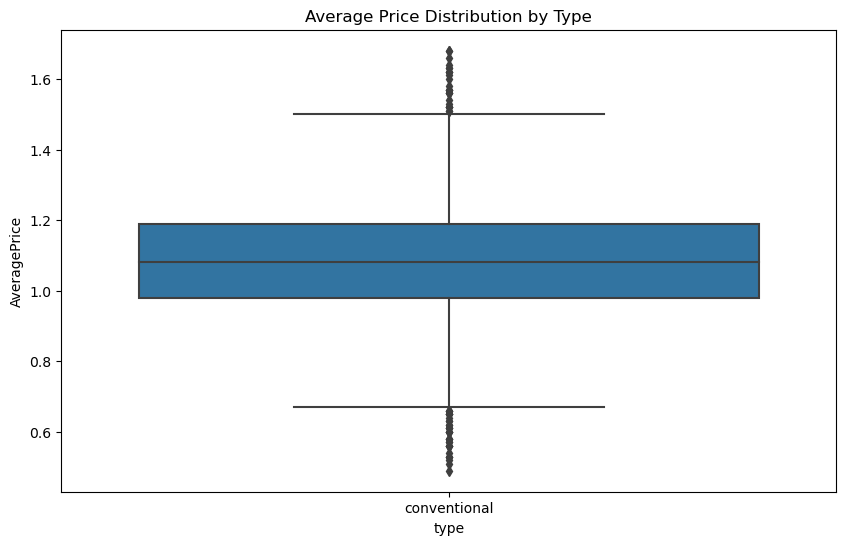

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='AveragePrice', data=avocado_df)
plt.title('Average Price Distribution by Type')
plt.show()


In [12]:
avocado_df.dropna(inplace=True) 

In [13]:
print(avocado_df.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [14]:
X_classification = avocado_df.drop(['Date', 'AveragePrice', 'region'], axis=1) 
y_classification = avocado_df['region']

In [15]:
X_regression = avocado_df.drop(['Date', 'AveragePrice', 'region'], axis=1) 
y_regression = avocado_df['AveragePrice']

In [16]:
# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


In [19]:

X_classification_encoded = pd.get_dummies(X_classification, columns=['type'])


X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification_encoded, y_classification, test_size=0.2, random_state=42)


models_cls = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models_cls.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred_cls = model.predict(X_test_cls)
    print(f"Model: {name}")
    print(classification_report(y_test_cls, y_pred_cls))
    print(confusion_matrix(y_test_cls, y_pred_cls))
    print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_cls)}")
    print()

C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

Model: Logistic Regression
                     precision    recall  f1-score   support

             Albany       0.00      0.00      0.00         9
            Atlanta       0.45      0.33      0.38        15
BaltimoreWashington       0.58      0.92      0.71        12
              Boise       0.00      0.00      0.00        12
             Boston       0.43      0.50      0.46         6
   BuffaloRochester       0.33      0.50      0.40         8
         California       0.26      0.82      0.40        17
          Charlotte       0.00      0.00      0.00         9
            Chicago       1.00      0.86      0.92         7
           Columbus       0.00      0.00      0.00         9
      DallasFtWorth       0.50      0.20      0.29         5
             Denver       0.27      1.00      0.43         3
            Detroit       0.30      1.00      0.47        10
        GrandRapids       0.00      0.00      0.00         4
         GreatLakes       0.67      1.00      0.80       

C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:

X_regression_encoded = pd.get_dummies(X_regression, columns=['type'])


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression_encoded, y_regression, test_size=0.2, random_state=42)


models_reg = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_reg)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg)}")
    print(f"R-squared: {r2_score(y_test_reg, y_pred_reg)}")
    print()

Model: Linear Regression
Mean Squared Error: 0.029732915185724722
R-squared: 0.15273305861194153

Model: Random Forest Regressor
Mean Squared Error: 0.0056936687171052726
R-squared: 0.8377536393896967

Model: Gradient Boosting Regressor
Mean Squared Error: 0.009035850960430209
R-squared: 0.7425150625742301



In [22]:
best_classifier = None
best_classifier_name = None
best_classifier_score = 0

In [23]:
for name, model in models_cls.items():
   
    params = {} 
    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train_cls, y_train_cls)

C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

In [25]:
if grid_search.best_score_ > best_classifier_score:
    best_classifier = grid_search.best_estimator_
    best_classifier_name = name
    best_classifier_score = grid_search.best_score_

In [26]:
best_classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = best_classifier.predict(X_test_cls)
print("Best Classifier:", best_classifier_name)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))

Best Classifier: Support Vector Machine
Classification Report:
                     precision    recall  f1-score   support

             Albany       0.05      1.00      0.10         9
            Atlanta       0.00      0.00      0.00        15
BaltimoreWashington       0.00      0.00      0.00        12
              Boise       0.00      0.00      0.00        12
             Boston       0.08      0.67      0.15         6
   BuffaloRochester       0.00      0.00      0.00         8
         California       0.61      1.00      0.76        17
          Charlotte       0.00      0.00      0.00         9
            Chicago       0.00      0.00      0.00         7
           Columbus       0.00      0.00      0.00         9
      DallasFtWorth       0.00      0.00      0.00         5
             Denver       0.00      0.00      0.00         3
            Detroit       0.00      0.00      0.00        10
        GrandRapids       0.00      0.00      0.00         4
         GreatLakes  

C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
best_regressor = None
best_regressor_name = None
best_regressor_score = float('inf')


In [28]:
for name, model in models_reg.items():
    
    params = {} 
    grid_search = GridSearchCV(model, params, cv=5) 
    grid_search.fit(X_train_reg, y_train_reg)

In [29]:
if grid_search.best_score_ < best_regressor_score:
        best_regressor = grid_search.best_estimator_
        best_regressor_name = name
        best_regressor_score = grid_search.best_score_


In [30]:
best_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = best_regressor.predict(X_test_reg)
print("Best Regressor:", best_regressor_name)
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_reg))

Best Regressor: Gradient Boosting Regressor
Mean Squared Error: 0.008783992512872934
R-squared: 0.7496920021777524


# the best model is selected based on cross-validated performance (best_score_).